# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

In [1]:
# Disabling warnings, since saga solver not always converge with given max_iter
import warnings
warnings.simplefilter("ignore")

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [2]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape, dataset.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,) (846, 20)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [4]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,586,98,55,108,168,53,11,224,30,25,178,231,737,217,73,8,30,187,198
1,799,92,39,76,180,71,6,152,43,19,131,179,350,143,72,6,14,195,200
2,238,100,55,101,189,57,10,222,30,25,177,225,731,211,71,7,17,188,197
3,329,89,38,80,169,59,7,161,41,20,131,186,389,137,68,5,15,192,197
4,841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
5,378,82,36,54,117,53,7,125,54,18,126,146,229,128,78,1,5,180,184
6,580,85,42,66,120,53,7,149,45,19,145,173,325,163,85,5,4,180,182
7,163,85,40,72,139,59,5,132,50,18,135,159,260,150,68,3,9,191,195
8,317,95,45,105,208,64,10,187,36,22,150,202,520,158,64,7,32,198,211
9,210,94,39,89,194,62,9,172,38,21,135,191,444,121,63,4,23,201,209


Methods `describe` and `info` deliver some useful information.

In [5]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,426.828780,93.670310,44.739526,81.945355,169.23133,61.681239,8.31694,168.613843,40.925319,20.581056,147.748634,188.375228,438.637523,174.074681,72.273224,6.473588,12.613843,189.169399,195.759563
std,244.292991,8.255868,6.144512,15.557778,33.69078,7.747994,3.78502,32.741526,7.728034,2.558670,14.420137,31.151522,173.978431,32.789751,7.262168,4.965367,9.207278,6.185580,7.472610
min,0.000000,73.000000,33.000000,42.000000,104.00000,47.000000,2.00000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,87.000000,40.000000,70.000000,142.00000,57.000000,6.00000,146.000000,33.000000,19.000000,136.000000,167.000000,318.000000,147.000000,67.000000,2.000000,5.000000,185.000000,190.000000
50%,422.000000,93.000000,44.000000,79.000000,169.00000,61.000000,8.00000,157.000000,43.000000,20.000000,146.000000,178.000000,364.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,640.000000,100.000000,49.000000,96.000000,195.00000,65.000000,10.00000,197.000000,46.000000,23.000000,159.000000,215.000000,583.000000,198.000000,75.000000,10.000000,19.000000,194.000000,201.000000
max,845.000000,119.000000,58.000000,112.000000,333.00000,138.000000,49.00000,265.000000,59.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [6]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int32
1     549 non-null int32
2     549 non-null int32
3     549 non-null int32
4     549 non-null int32
5     549 non-null int32
6     549 non-null int32
7     549 non-null int32
8     549 non-null int32
9     549 non-null int32
10    549 non-null int32
11    549 non-null int32
12    549 non-null int32
13    549 non-null int32
14    549 non-null int32
15    549 non-null int32
16    549 non-null int32
17    549 non-null int32
18    549 non-null int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [7]:
### We will use standard scaling (subtraction the mean and division by std) from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test) # Transform test data using only knowledge about train
pd.DataFrame(X_train_scaled).head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.652153,0.524916,1.671383,1.676230,-0.036581,-1.121472,0.709509,1.693161,-1.415015,1.728622,2.099769,1.369553,1.716503,1.310302,0.100168,0.307692,1.890028,-0.351039,0.300093
1,1.524852,-0.202502,-0.934942,-0.382495,0.319924,1.203829,-0.612692,-0.507887,0.268707,-0.618485,-1.162535,-0.301230,-0.509939,-0.948559,-0.037657,-0.095465,0.150687,0.943472,0.567982
2,-0.773665,0.767389,1.671383,1.225883,0.587303,-0.604738,0.445069,1.632021,-1.415015,1.728622,2.030358,1.176770,1.681985,1.127151,-0.175483,0.106113,0.476814,-0.189225,0.166149
3,-0.400822,-0.566212,-1.097837,-0.125155,-0.006873,-0.346371,-0.348252,-0.232756,0.009672,-0.227300,-1.162535,-0.076317,-0.285569,-1.131710,-0.588959,-0.297044,0.259396,0.458030,0.166149
4,1.696933,-0.081266,-0.934942,0.325191,0.409050,0.299545,-0.083812,0.011805,-0.119845,-0.227300,-0.954302,0.373509,-0.095717,-0.765408,-0.037657,0.106113,1.346484,-0.189225,-0.101739
5,-0.200060,-1.414867,-1.423628,-1.797869,-1.551729,-1.121472,-0.348252,-1.333280,1.693394,-1.009669,-1.509588,-1.361535,-1.206062,-1.406436,0.789296,-1.103359,-0.827692,-1.483735,-1.575124
6,0.627570,-1.051157,-0.446256,-1.025847,-1.462603,-1.121472,-0.348252,-0.599597,0.527741,-0.618485,-0.190785,-0.494013,-0.653766,-0.338056,1.754074,-0.297044,-0.936400,-1.483735,-1.843012
7,-1.080954,-1.051157,-0.772047,-0.639836,-0.898136,-0.346371,-0.877133,-1.119289,1.175326,-1.009669,-0.884892,-0.943839,-1.027716,-0.734883,-0.588959,-0.700201,-0.392857,0.296216,-0.101739
8,-0.449988,0.161207,0.042430,1.483224,1.151770,0.299545,0.445069,0.562067,-0.637913,0.555069,0.156269,0.437770,0.468085,-0.490682,-1.140261,0.106113,2.107446,1.428913,2.041367
9,-0.888386,0.039970,-0.934942,0.453862,0.735847,0.041179,0.180629,0.103515,-0.378879,0.163884,-0.884892,0.084335,0.030851,-1.620112,-1.278087,-0.498623,1.129066,1.914354,1.773478


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [8]:
from sklearn.linear_model import LogisticRegressionCV
l1_ratio_grid = np.linspace(0, 1, num=11)
# By default metric for CV is accuracy, and C grid is uniform on log scale from 1e-4 to 1e4
model = LogisticRegressionCV(penalty='elasticnet', solver='saga', tol=1e-3, max_iter=500, multi_class='multinomial',
                            l1_ratios=l1_ratio_grid, cv=5)
model.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                     max_iter=500, multi_class='multinomial', n_jobs=None,
                     penalty='elasticnet', random_state=None, refit=True,
                     scoring=None, solver='saga', tol=0.001, verbose=0)

In [9]:
from sklearn.metrics import accuracy_score, f1_score
acc = accuracy_score(y_test, model.predict(X_test_scaled))
f1_macro = f1_score(y_test, model.predict(X_test_scaled), average='macro')
print("Accuracy score is", acc)
print("F1 macro score is", f1_macro)
print("Reg parameter C is", model.C_[0])
print("L1 reg ratio is", model.l1_ratio_[0])

Accuracy score is 0.7946127946127947
F1 macro score is 0.7923545632449742
Reg parameter C is 166.81005372000558
L1 reg ratio is 0.7000000000000001


By cross-validation we found out that weak regulariztion gives the best score.

Let's fit model on non-scaled data and compare metrics.

In [10]:
unscaled_model = LogisticRegressionCV(penalty='elasticnet', solver='saga', tol=1e-3, max_iter=500,
                                      multi_class='multinomial',l1_ratios=l1_ratio_grid, cv=5)
unscaled_model.fit(X_train, y_train)
acc = accuracy_score(unscaled_model.predict(X_test), y_test)
f1_macro = f1_score(unscaled_model.predict(X_test), y_test, average='macro')
print("Accuracy score is", acc)
print("F1 macro score is", f1_macro)
print("Reg parameter C is", unscaled_model.C_[0])
print("L1 reg ratio is", unscaled_model.l1_ratio_[0])

Accuracy score is 0.7373737373737373
F1 macro score is 0.7240487293863206
Reg parameter C is 0.046415888336127774
L1 reg ratio is 0.0


As we can see, scaling data has the impact on model quality

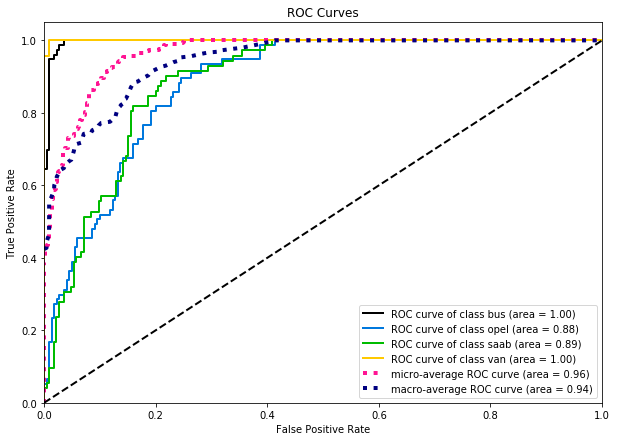

In [11]:
from scikitplot.metrics import plot_roc
import matplotlib.pyplot as plt
%matplotlib inline

plot_roc(y_test, model.predict_proba(scaler.transform(X_test)), figsize=(10,7))
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [12]:
# Since PCA is one of the ways of preprocessing data we won't be using scaled train data
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)

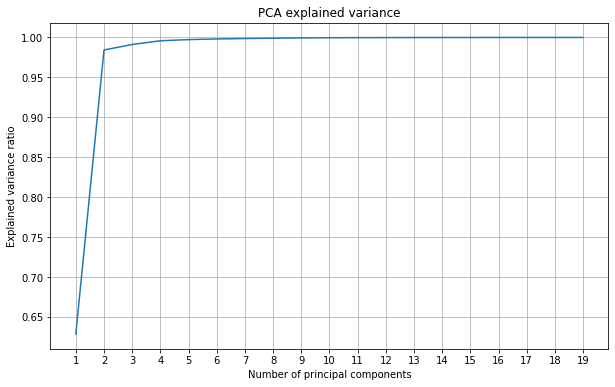

In [13]:
plt.figure(figsize=(10,6))
plt.grid()
plt.title("PCA explained variance")
plt.xlabel("Number of principal components")
plt.ylabel("Explained variance ratio")
plt.xticks(np.arange(20) + 1)
plt.yticks(np.linspace(0.5, 1, num=11))
plt.plot(np.arange(19) + 1, np.cumsum(pca.explained_variance_ratio_))
plt.show()

Since we did not scale data before PCA, components with high variance certainly will have bigger impact than others. This is why we shold normalize data before using PCA. 

Let's build the same plot for scaled data and compare the explained variances.

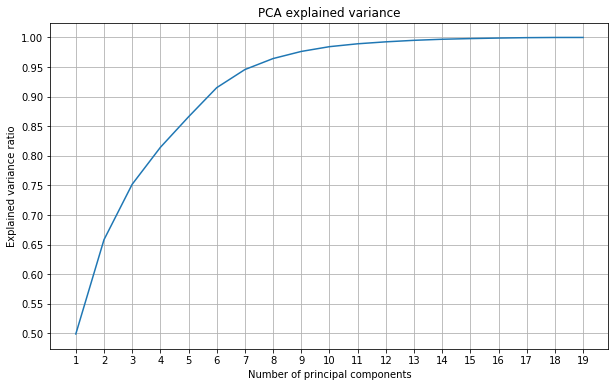

In [14]:
pca_scaled = PCA().fit(X_train_scaled)
plt.figure(figsize=(10,6))
plt.grid()
plt.title("PCA explained variance")
plt.xlabel("Number of principal components")
plt.ylabel("Explained variance ratio")
plt.xticks(np.arange(20) + 1)
plt.yticks(np.linspace(0.5, 1, num=11))
plt.plot(np.arange(19) + 1, np.cumsum(pca_scaled.explained_variance_ratio_))
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Need in preprocessing of data is explained above. Short answer: yes, we should normalize the data.

I will set number of principal components in PCA to 12, since according to the plot above it explains approximately 99% of variance and reduces number of features almost by 1/3.

In [15]:
pca = PCA(n_components=12).fit(X_train_scaled)
X_train_pc = pca.transform(X_train_scaled)
X_test_pc = pca.transform(X_test_scaled)
print('Train principal components shape:', X_train_pc.shape)
print('Test principal components shape:', X_test_pc.shape)

Train principal components shape: (549, 12)
Test principal components shape: (297, 12)


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [16]:
model.fit(X_train_pc, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                     max_iter=500, multi_class='multinomial', n_jobs=None,
                     penalty='elasticnet', random_state=None, refit=True,
                     scoring=None, solver='saga', tol=0.001, verbose=0)

In [17]:
acc = accuracy_score(y_test, model.predict(X_test_pc))
f1_macro = f1_score(y_test, model.predict(X_test_pc), average='macro')
print("Accuracy score is", acc)
print("F1 macro score is", f1_macro)
print("Reg parameter C is", model.C_[0])
print("L1 reg ratio is", model.l1_ratio_[0])

Accuracy score is 0.7272727272727273
F1 macro score is 0.7258643272232649
Reg parameter C is 21.54434690031882
L1 reg ratio is 0.0


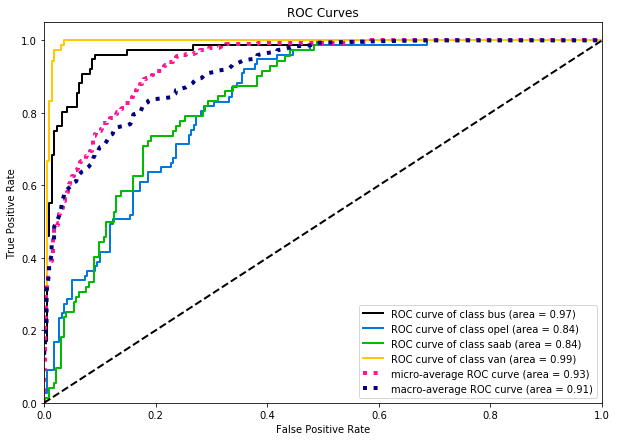

In [18]:
plot_roc(y_test, model.predict_proba(X_test_pc), figsize=(10,7))
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

max_depth_grid = {
    'max_depth' : np.arange(1, 100)
}
clf = DecisionTreeClassifier()
tree_cv = GridSearchCV(clf, max_depth_grid, scoring='accuracy', 
                       cv=StratifiedShuffleSplit(n_splits=10, test_size = 0.2, random_state = 0))
tree_cv.fit(X_train_pc, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_...
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42,

In [20]:
acc = accuracy_score(y_test, tree_cv.predict(X_test_pc))
f1_macro = f1_score(y_test, tree_cv.predict(X_test_pc), average='macro')
print("Accuracy score is", acc)
print("F1 macro score is", f1_macro)
print("Tree max_depth is", tree_cv.best_params_['max_depth'])

Accuracy score is 0.5959595959595959
F1 macro score is 0.5978560471322806
Tree max_depth is 43


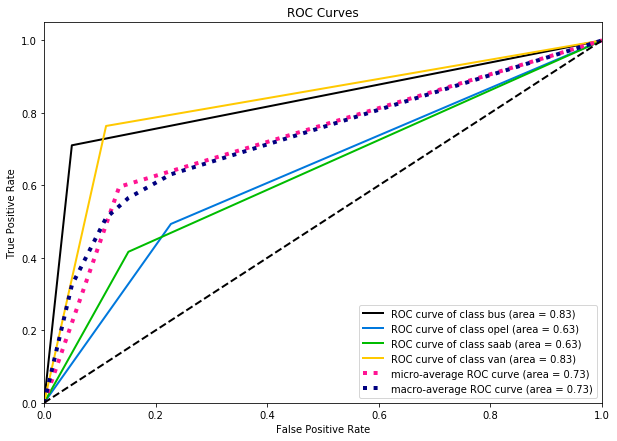

In [21]:
plot_roc(y_test, tree_cv.predict_proba(X_test_pc), figsize=(10,7))
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of N algorithms varying N from 2 to 100 (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


To build a __Bagging__ ensebmle you might generate 50 subsets of `train` data (of the same size as the original dataset) using bootstrap procedure. Then you train logistic regression/decision tree with optimal hyperparameters you estimated before on each subset. Finally, you average the models predictions.

*Hint: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [22]:
# Since we want to build ensembles with hyperparameters from the previous steps
from sklearn.linear_model import LogisticRegression

print("Hyperparameters for logistic regression (for each class):")
print("C =", model.C_)
print("l1_ratio =", model.l1_ratio_)
logreg_estimator = LogisticRegression(penalty='elasticnet', solver='saga', tol=1e-3, max_iter=500,
                                      multi_class='multinomial', C=model.C_[0], l1_ratio=model.l1_ratio_[0])

print("\nHyperparameters for tree classifier:")
print("max_depth =", tree_cv.best_params_['max_depth'])
tree_estimator = DecisionTreeClassifier(max_depth=tree_cv.best_params_['max_depth'])

Hyperparameters for logistic regression (for each class):
C = [21.5443469 21.5443469 21.5443469 21.5443469]
l1_ratio = [0. 0. 0. 0.]

Hyperparameters for tree classifier:
max_depth = 43


In [23]:
from sklearn.ensemble import BaggingClassifier

acc_logreg = []
acc_tree = []
f1_logreg = []
f1_tree = []
for i in range(2, 100, 5):
    # Max_features = X.shape[1] and max_samples = X.shape[0] by default
    logreg_ensemble = BaggingClassifier(base_estimator=logreg_estimator, n_estimators = i)
    tree_ensemble = BaggingClassifier(base_estimator=tree_estimator, n_estimators = i)
    logreg_ensemble.fit(X_train_pc, y_train)
    tree_ensemble.fit(X_train_pc, y_train)
    acc_logreg.append(accuracy_score(y_test, logreg_ensemble.predict(X_test_pc)))
    f1_logreg.append(f1_score(y_test, logreg_ensemble.predict(X_test_pc), average="macro"))
    acc_tree.append(accuracy_score(y_test, tree_ensemble.predict(X_test_pc)))
    f1_tree.append(f1_score(y_test, tree_ensemble.predict(X_test_pc), average="macro"))

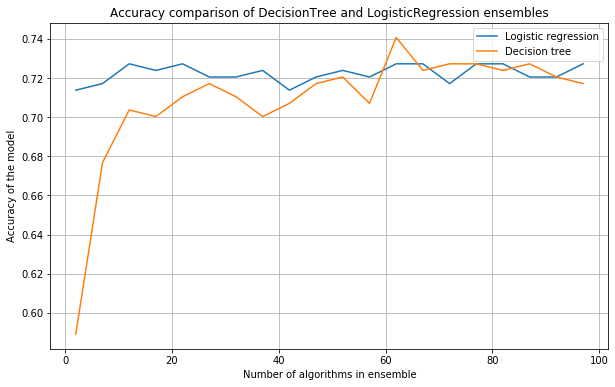

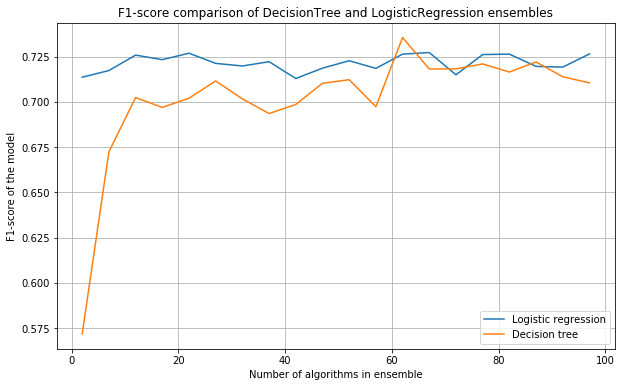

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, 100, 5), acc_logreg, label="Logistic regression")
plt.plot(np.arange(2, 100, 5), acc_tree, label="Decision tree")
plt.grid()
plt.legend()
plt.xlabel("Number of algorithms in ensemble")
plt.ylabel("Accuracy of the model")
plt.title("Accuracy comparison of DecisionTree and LogisticRegression ensembles")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, 100, 5), f1_logreg, label="Logistic regression")
plt.plot(np.arange(2, 100, 5), f1_tree, label="Decision tree")
plt.grid()
plt.legend()
plt.xlabel("Number of algorithms in ensemble")
plt.ylabel("F1-score of the model")
plt.title("F1-score comparison of DecisionTree and LogisticRegression ensembles")
plt.show()

As we can see, ensembles quite sensitive to bagging. Since we create completely different bags from dataset for each number of algorithms in ensemble its quite hard to look for global trends on these plots.

However, we can conclude that generalization ability of logistic regression does not grow with number of base estimators in ensemble and scores remain on one level. For decision trees we can see a big jump in first ~15 algorithms and then slow growth till 100 base estimators.

Actually I have no idea how I should think about max_depth of trees looking and these plots. We should fix one tree or one ensemble and build score / max_depth plot to answer this question properly.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [33]:
from sklearn.ensemble import RandomForestClassifier

acc_forest = []
f1_forest = []
for i in range(2, 100, 5):
    forest = RandomForestClassifier(n_estimators=i)
    forest.fit(X_train_pc, y_train)
    acc_forest.append(accuracy_score(y_test, forest.predict(X_test_pc)))
    f1_forest.append(f1_score(y_test, forest.predict(X_test_pc), average="macro"))
    
forest_best_trees_count = np.arange(2, 100, 5)[np.argmax(acc_forest)]
print("Best trees amount is", forest_best_trees_count)

Best trees amount is 67


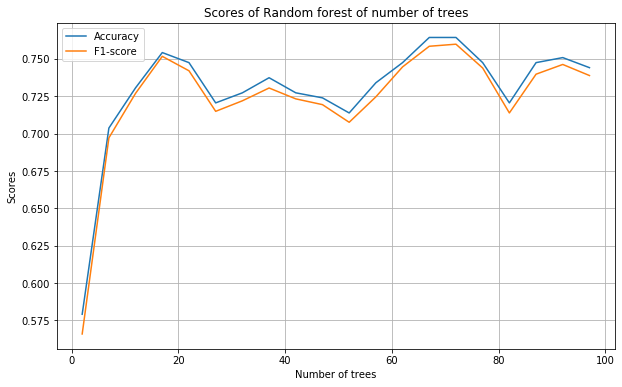

In [34]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(2, 100, 5), acc_forest, label="Accuracy")
plt.plot(np.arange(2, 100, 5), f1_forest, label="F1-score")
plt.title("Scores of Random forest of number of trees")
plt.xlabel("Number of trees")
plt.ylabel("Scores")
plt.legend()
plt.grid()
plt.show()

I assume optimal number of trees is between 30 and 40 since after this amount of trees we don't get significant growth in scores with growth of amount of trees in forest. 

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [36]:
acc_scores = np.zeros((3, 10))
f1_scores  = np.zeros((3, 10))

logreg_estimator = LogisticRegression(penalty='elasticnet', solver='saga', tol=1e-3, max_iter=500,
                                      multi_class='multinomial', C=model.C_[0], l1_ratio=model.l1_ratio_[0])
tree_estimator = DecisionTreeClassifier(max_depth=tree_cv.best_params_['max_depth'])
forest_estimator = RandomForestClassifier(n_estimators=forest_best_trees_count)

for i in range(10):
    n = int((0.1 + i * 0.1) * X_train_pc.shape[0])
    logreg_estimator.fit(X_train_pc[:n], y_train[:n])
    tree_estimator.fit(X_train_pc[:n], y_train[:n])
    forest_estimator.fit(X_train_pc[:n], y_train[:n])
    acc_scores[0,i] = accuracy_score(y_test, logreg_estimator.predict(X_test_pc))
    acc_scores[1,i] = accuracy_score(y_test, tree_estimator.predict(X_test_pc))
    acc_scores[2,i] = accuracy_score(y_test, forest_estimator.predict(X_test_pc))
    f1_scores[0,i] = f1_score(y_test, logreg_estimator.predict(X_test_pc), average='macro')
    f1_scores[1,i] = f1_score(y_test, tree_estimator.predict(X_test_pc), average='macro')
    f1_scores[2,i] = f1_score(y_test, forest_estimator.predict(X_test_pc), average='macro')

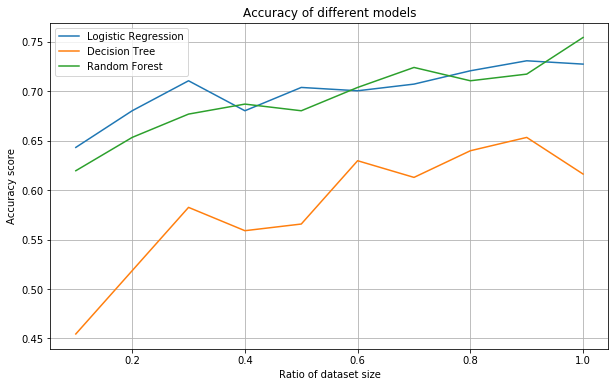

In [37]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0.1, 1.1, 0.1), acc_scores[0], label="Logistic Regression")
plt.plot(np.arange(0.1, 1.1, 0.1), acc_scores[1], label="Decision Tree")
plt.plot(np.arange(0.1, 1.1, 0.1), acc_scores[2], label="Random Forest")
plt.title("Accuracy of different models")
plt.xlabel("Ratio of dataset size")
plt.ylabel("Accuracy score")
plt.legend()
plt.grid()
plt.show()

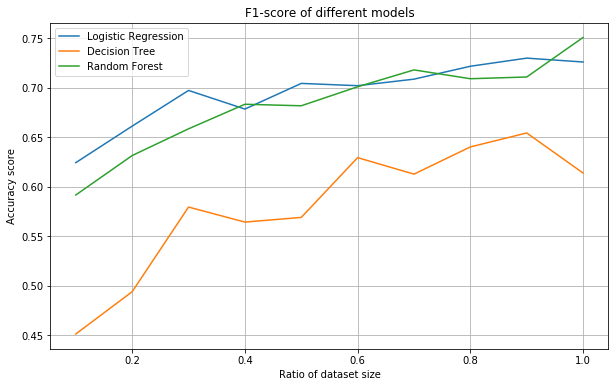

In [38]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0.1, 1.1, 0.1), f1_scores[0], label="Logistic Regression")
plt.plot(np.arange(0.1, 1.1, 0.1), f1_scores[1], label="Decision Tree")
plt.plot(np.arange(0.1, 1.1, 0.1), f1_scores[2], label="Random Forest")
plt.title("F1-score of different models")
plt.xlabel("Ratio of dataset size")
plt.ylabel("Accuracy score")
plt.legend()
plt.grid()
plt.show()